# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 7 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    
    def __init__(self, k = 2, linkage = "single"):
        self.clust = k ##требуемое количество кластеров
        self.linkage = linkage ## тип определения близости кластеров
        return
    
    
    def single_linkage(self, C_a, C_b): ##ищется минимум по расстоянию между точками, принадлежащих каждому кластеру
        min_dist = float("inf")
        
        for i in self.points_in_clusters[C_a]:
            for j in self.points_in_clusters[C_b]:
                dist = self.distances_points[i][j]
                if dist < min_dist:
                    min_dist = dist
        return min_dist
    
        
    def complete_linkage(self, C_a, C_b): ##ищется максимум по расстоянию между точками, принадлежащих каждому кластеру
        max_dist = float("-inf")
        
        for i in self.points_in_clusters[C_a]:
            for j in self.points_in_clusters[C_b]:
                dist = self.distances_points[i][j]
                if dist > max_dist:
                    max_dist = dist   
        return max_dist
        
    
    def average_linkage(self, C_a, C_b):
        numb_of_a = len(self.points_in_clusters[C_a])
        numb_of_b = len(self.points_in_clusters[C_b])
        sum_of_dist = 0
        for i in self.points_in_clusters[C_a]:
            for j in self.points_in_clusters[C_b]:
                    sum_of_dist += self.distances_points[i][j]
                    
        return (sum_of_dist/(numb_of_a*numb_of_b))
    
    
    def linkage_type(self, C_a, C_b):
        if self.linkage == "single":
            return self.single_linkage(C_a, C_b)
        else:
            if self.linkage == "complete":
                return self.complete_linkage(C_a, C_b)   
            else:
                if self.linkage == "average":
                    return self.average_linkage(C_a, C_b)
        
    
    def merge(self, C_a, C_b): ##соединяем два кластера 
       
        self.points_in_clusters[C_b] = self.points_in_clusters[C_a] | self.points_in_clusters[C_b]
        for i in xrange(0, C_b-1):
                    self.distances[i][C_b] = self.linkage_type(i, C_b)
        for j in xrange(C_b+1, self.cur_clusters):
                    self.distances[C_b][j] = self.linkage_type(C_b, j)
        self.distances[C_b][C_b] = float("inf")
        
        self.points_in_clusters.remove(self.points_in_clusters[C_a])
        self.distances = np.delete(self.distances, (C_a), axis=0)
        self.distances = np.delete(self.distances, (C_a), axis=1)
        return self
        
    def fit(self, x, y=None):
        self.data = x 
        self.x_len = len(x) ##количество точек
        self.cur_clusters = len(x) ##текущее количество кластеров
        self.labels = np.zeros(len(x)) ##массив с обозначениями, какому кластеру принадлежит точка
        
        self.points_in_clusters = [{i} for i in xrange(len(x))]
        self.distances_points = ss.distance.cdist(self.data, self.data) ##массив расстояний между точками
        self.distances = self.distances_points.copy()   
        
        for i in xrange(self.cur_clusters):
            for j in xrange(i+1):
                self.distances[i][j] = float("inf")
        
        while self.cur_clusters > self.clust:
            arg_min = argmin(self.distances)
            C_a = arg_min/self.cur_clusters
            C_b = arg_min % self.cur_clusters
            self.merge(C_a, C_b)
            self.cur_clusters -= 1
        
        for i in xrange(len(self.points_in_clusters)):
            for j in self.points_in_clusters[i]:
                self.labels[j] = i
                
        return self
    
    def predict(self, x):
        
        self.fit(x)
        return self.labels
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.labels

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

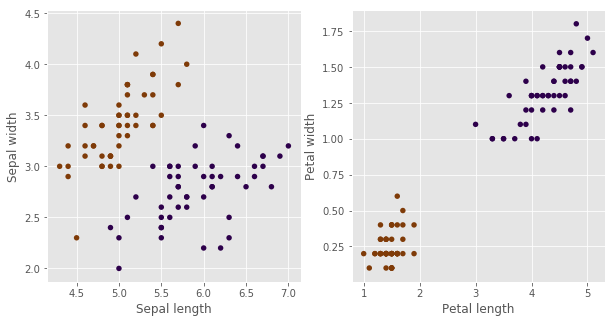

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
## время работы библиотечного алгоритма
for i in xrange(10):
    result = %timeit -o -q -n 1 -r 1 sc.AgglomerativeClustering(n_clusters=2, connectivity=None, linkage='complete').fit_predict(x_iris)
result.best


0.0004019737243652344

In [7]:
pred_iris1 = Clustering(2, "single").fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris1)

Adjusted Rand index for iris is: 1.00


In [8]:
for i in xrange(10):
    result = %timeit -o -q -n 1 -r 1 Clustering(2, "complete").fit(x_iris)
result.best

0.039366960525512695

In [9]:
pred_iris2 = Clustering(2, "complete").fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris2)

Adjusted Rand index for iris is: 1.00


In [10]:
pred_iris3 = Clustering(2, "average").fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris2)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [11]:
## Задание 2
'''
Sihouette
'''
def quality(x, y):
    sum_ = 0
    
    distances = ss.distance.cdist(x, x, "euclidean")
    for i in xrange(len(x)):
        sum_a = 0
        numb_of_a = 0
        dist = 0
        clust_b = [] ##какие кластеры уже вошли в списки
        sum_b = [] 
        numb_of_b = []
        min_b_dist = float("inf")
        for j in xrange(len(x)):
            if y[j] == y[i]:
                numb_of_a += 1
                sum_a += distances[i][j]
            else:
                flag = 0
                for k in xrange (len(clust_b)):
                    if clust_b[k] == y[j]:
                        flag = 1
                        numb_of_b[k] += 1
                        sum_b[k] += distances[i][j]
                if flag == 0:
                    clust_b.append(int(y[j]))
                    numb_of_b.append(int(1))
                    sum_b.append(distances[i][j])
        for t in xrange(len(clust_b)):
            dist = sum_b[t]/numb_of_b[t]
            if dist < min_b_dist:
                min_b_dist = dist
                
        sum_ += (min_b_dist - (sum_a/numb_of_a))/max(sum_a/numb_of_a, min_b_dist)
                     
    
    return sum_/len(x)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

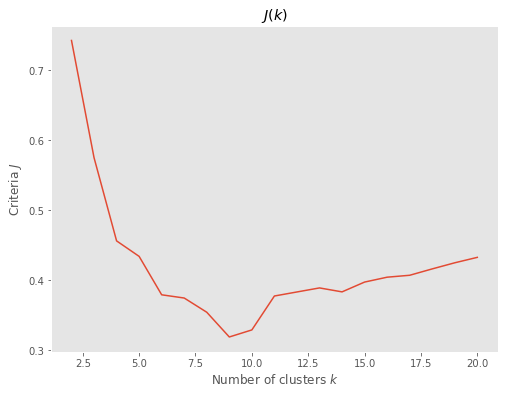

In [12]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k, linkage = "average")
    y = cls.fit(x_iris).labels
    criteria[i] = quality(x_iris, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [13]:
k = argmax(criteria) + 2
print k

2


In [14]:
## Задание 3

In [15]:
df = pd.read_csv('WDIData.csv')

begin = df.loc[df['Country Name']=='Afghanistan'].index[0]
df = df.iloc[begin:]

In [16]:
df2 = df[['Country Name', 'Indicator Code', '2014']] ##фиксирую 2014 год

In [17]:
df2 = df2.set_index(['Country Name', 'Indicator Code'])
df2 = df2.unstack()
df2 = df2['2014']

In [18]:
from sklearn import preprocessing

df2 = df2.fillna(df2.mean(axis=0))
df2 = df2.fillna(0)

normalized_X = preprocessing.normalize(df2)

In [19]:
labels = df2.index.tolist()

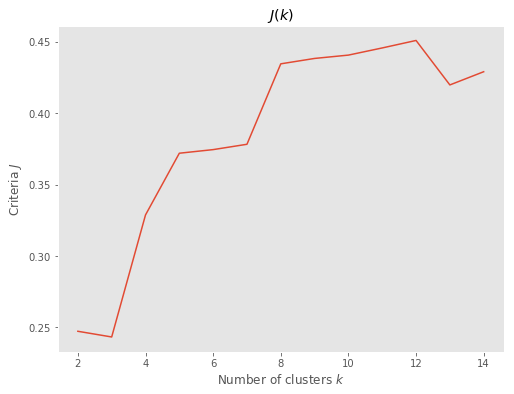

In [20]:
ks = range(2, 15)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cluster = Clustering(k, linkage = "complete")
    clusters = cluster.fit_predict(normalized_X)
    criteria[i] = (quality(normalized_X, clusters))
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [21]:
arg_max = argmax(criteria) + 2
arg_max

12

In [22]:
cls1 = Clustering(arg_max, linkage = "complete")
clusters = cls1.fit_predict(normalized_X)

In [23]:
import sys
reload(sys)
sys.setdefaultencoding('UTF8')

embedded = sm.TSNE(n_components=2).fit_transform(normalized_X)

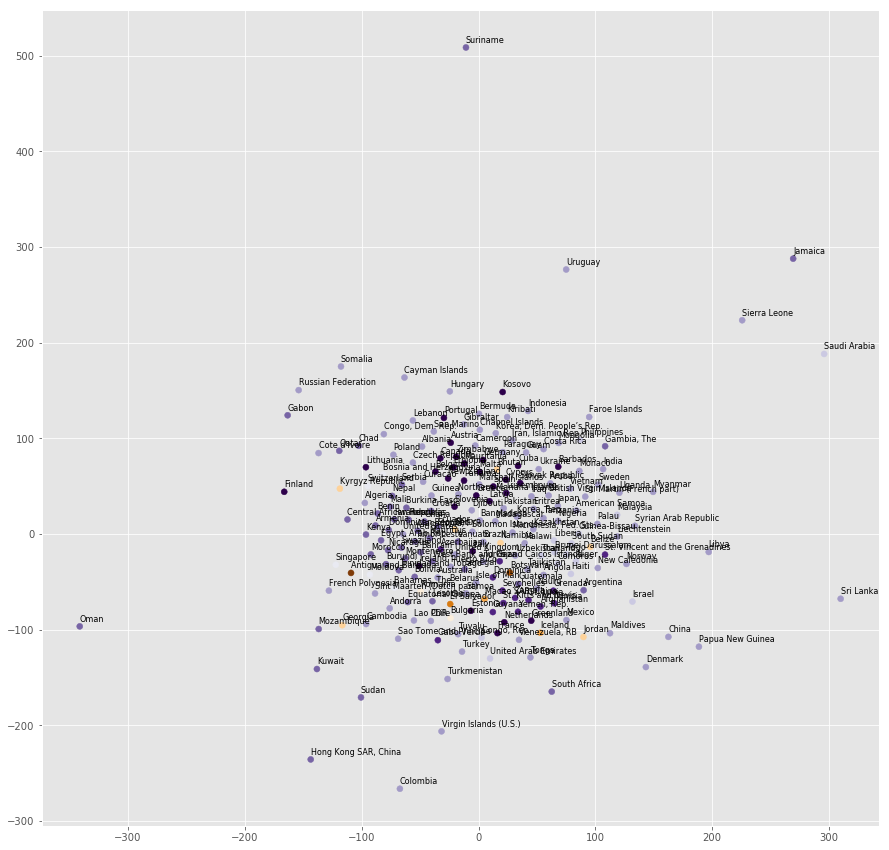

In [24]:
plt.figure(figsize=(15, 15))
plt.scatter(embedded[:,0], embedded[:,1], c=clusters, cmap=pl.cm.PuOr)
for i, label in enumerate(labels):
    plt.annotate(str(label), xy=embedded[i], xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.show()


## Задание 4
0. Antiqua and Barbuda
1. Botswana
2. El Salvador
3. Iceland, China - возможно, связаны тем, что происходит диверсификация экономики
4. небольшие бедные страны в Африке и Азии
5. Восточная Европа
6. небольшие европейские и азиатские страны
7. страны, расположенные в жарком климате
8. основное число стран
9. В основном, африканские и ближневосточные страны
10. Небольшие страны, перенесшие государственные перевороты и войны
11. В основном, Европа

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.